In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read survey_results_public.csv 


In [3]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### 2. Take a look at the data itself

In [4]:
df.dtypes # Columns and their data types, types are mapped to pd specific types, int = int64

ResponseId               int64
Q120                    object
MainBranch              object
Age                     object
Employment              object
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 84, dtype: object

In [5]:
df.describe() # Statistical analysis of numerical data that exists in the table

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [6]:
df.columns # get all columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

### 3. Extract desired rows and columns
- lets take a look at MainBranch, Age, Country of first 10 developers

In [7]:
# method number one
first_10_developers = df[['MainBranch', 'Age', 'Country']].head(10)
first_10_developers

,MainBranch,Age,Country
0,None of these,18-24 years old,NaN
1,I am a developer by profession,25-34 years old,United States of America
2,I am a developer by profession,45-54 years old,United States of America
3,I am a developer by profession,25-34 years old,United States of America
4,I am a developer by profession,25-34 years old,Philippines
5,I am a developer by profession,35-44 years old,United Kingdom of Great Britain and Northern I...
6,I am a developer by profession,35-44 years old,United States of America
7,I am a developer by profession,25-34 years old,United States of America
8,"I am not primarily a developer, but I write co...",45-54 years old,Finland
9,I am a developer by profession,25-34 years old,India


In [8]:
# method number two
first_10_developers = df.iloc[:10, [2, 3, 18]]
first_10_developers

,MainBranch,Age,Country
0,None of these,18-24 years old,NaN
1,I am a developer by profession,25-34 years old,United States of America
2,I am a developer by profession,45-54 years old,United States of America
3,I am a developer by profession,25-34 years old,United States of America
4,I am a developer by profession,25-34 years old,Philippines
5,I am a developer by profession,35-44 years old,United Kingdom of Great Britain and Northern I...
6,I am a developer by profession,35-44 years old,United States of America
7,I am a developer by profession,25-34 years old,United States of America
8,"I am not primarily a developer, but I write co...",45-54 years old,Finland
9,I am a developer by profession,25-34 years old,India


In [9]:
# method number three
first_10_developers = df[df.columns[df.columns.isin(['MainBranch', 'Age', 'Country'])]].head(10)
first_10_developers

,MainBranch,Age,Country
0,None of these,18-24 years old,NaN
1,I am a developer by profession,25-34 years old,United States of America
2,I am a developer by profession,45-54 years old,United States of America
3,I am a developer by profession,25-34 years old,United States of America
4,I am a developer by profession,25-34 years old,Philippines
5,I am a developer by profession,35-44 years old,United Kingdom of Great Britain and Northern I...
6,I am a developer by profession,35-44 years old,United States of America
7,I am a developer by profession,25-34 years old,United States of America
8,"I am not primarily a developer, but I write co...",45-54 years old,Finland
9,I am a developer by profession,25-34 years old,India


### 4. set desired column as index
- in this case it is logical to use RespondId

In [10]:
df.set_index('ResponseId', inplace=True) # use inplace to modify the current df

### 5. create filter with two parameters
- let's create a filter that will help us find
- developers who from either India or USA
- and have worked with Python as a programming language

In [11]:
filter= (df['Country'].isin(['India', 'United States of America'])) & df['LanguageHaveWorkedWith'].str.contains('Python', na=False)
filtered_developers = df[filter]
filtered_developers.iloc[0:10].head() # select only first 10 columns and first 5 rows

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
8,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Codecademy;edX,...,NaN,NaN,NaN,60-120 minutes a day,30-60 minutes a day,None of these,Financial Services,NaN,NaN,80000.0
10,I agree,I am a developer by profession,25-34 years old,"Not employed, but looking for work",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,edX;Udemy;Pluralsight;Coursera;Udacity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
11,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Friend or family member...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,1-2 times a week,6-10 times a week,30-60 minutes a day,60-120 minutes a day,Automated testing;Continuous integration (CI) ...,Other,Appropriate in length,Neither easy nor difficult,NaN
14,I agree,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Online Courses or Certi...,Blogs with tips and tricks;Books;Video-based O...,edX;Udemy;Coursera,...,1-2 times a week,3-5 times a week,3-5 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Observability tools;Continuo...,"Information Services, IT, Software Development...",Appropriate in length,Easy,150000.0


### 6. Sort the df by two Columns
- Age
- ConvertedCompYearly

In [17]:
sorted_df = df.sort_values(by=['ConvertedCompYearly', 'Age'])
sorted_df[['Age', 'Country', 'Employment', 'ConvertedCompYearly']]

,Age,Country,Employment,ConvertedCompYearly
ResponseId,,,,
8863,18-24 years old,Viet Nam,"Employed, full-time",1.0
17986,18-24 years old,China,"Employed, full-time",1.0
63214,18-24 years old,India,"Employed, full-time",1.0
87481,18-24 years old,Lebanon,"Employed, full-time",1.0
2244,25-34 years old,India,"Employed, full-time",1.0
...,...,...,...,...
89066,Under 18 years old,United States of America,"Not employed, and not looking for work",NaN
89075,Under 18 years old,United States of America,"Student, full-time",NaN
89097,Under 18 years old,Viet Nam,"Not employed, and not looking for work",NaN


### 7. Use statistical functions

In [22]:
# calcualte mean salary of developers in the USA
usa_developers = df[df['Country'] == 'United States of America']

mean_salary_usa = usa_developers['ConvertedCompYearly'].mean()

print(f'developers mean yearly salary in the united states of america is:  {mean_salary_usa}')

developers mean yearly salary in the united states of america is:  170783.9611985523


In [23]:
# calculate average, least and most work Experience of developers in Switzerland
swiss_developers = df[df['Country'] == 'Switzerland']

average_work_experience = swiss_developers['WorkExp'].std()

least_work_experience = swiss_developers['WorkExp'].min()

most_work_experience = swiss_developers['WorkExp'].max()

# Display the results
print("standard deviation of working experience in years in Switzerland:", average_work_experience)
print("Least working experience in years of developers in Switzerland:", least_work_experience)
print("Most work experience in years of developers in Switzerland:", most_work_experience)


standard deviation of working experience in years in Switzerland: 8.804276561180716
Least working experience in years of developers in Switzerland: 0.0
Most work experience in years of developers in Switzerland: 50.0


### 7. Create graphs
- **graph number one**: developers average salary by their age
- **graph number two**: georgian developers and their average salary based on their experience
- **graph number three** heatmap of every programming language ever used by the developers in total

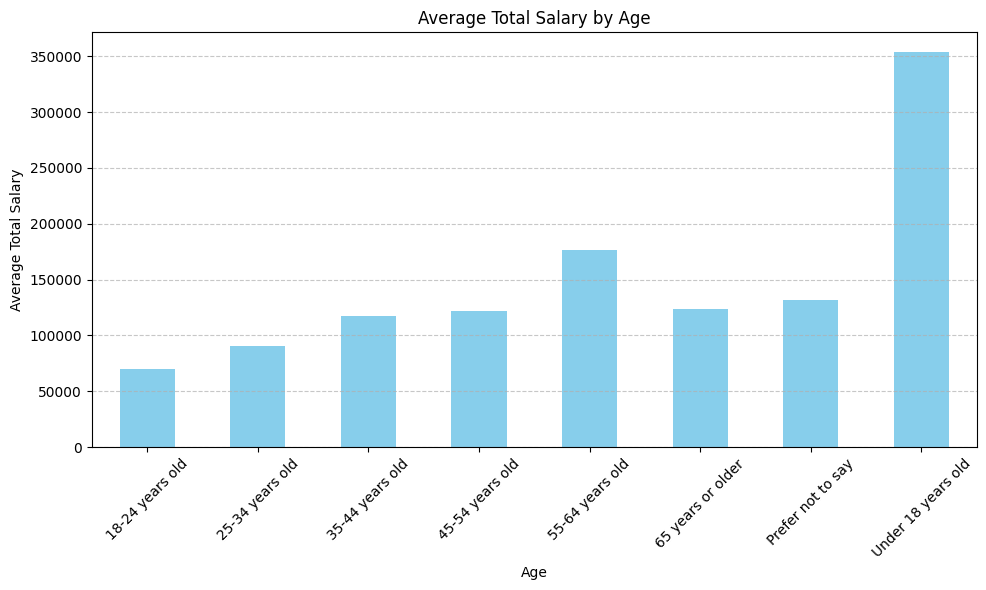

In [27]:
# Group by age and calculate the average total salary
age_salary_avg = df.groupby('Age')['ConvertedCompYearly'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
age_salary_avg.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Average Total Salary')
plt.title('Average Total Salary by Age')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_12032/812187211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  georgia_developers['WorkExp'] = georgia_developers['WorkExp'].astype(float)


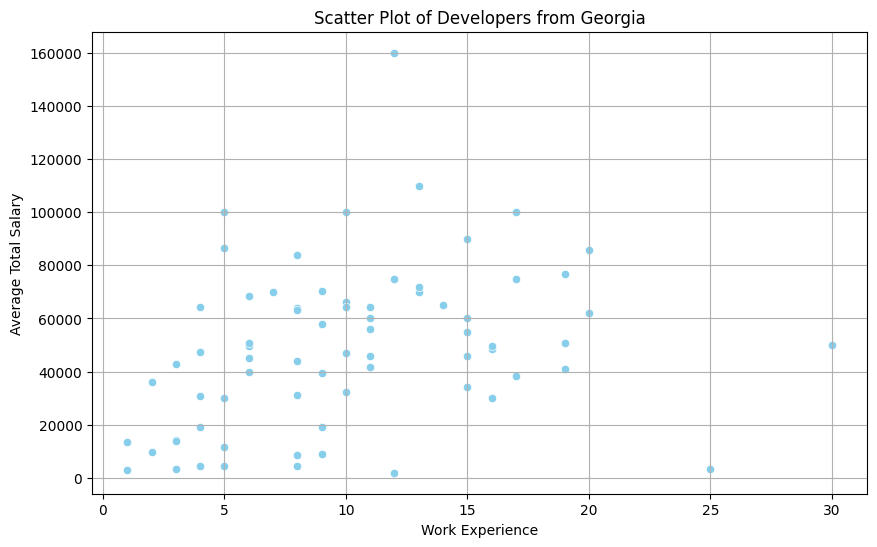

In [35]:
georgia_developers = df[df['Country'] == 'Georgia']

georgia_developers['WorkExp'] = georgia_developers['WorkExp'].astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=georgia_developers, x='WorkExp', y='ConvertedCompYearly', color='skyblue')
plt.xlabel('Work Experience')
plt.ylabel('Average Total Salary')
plt.title('Scatter Plot of Developers from Georgia')
plt.grid(True)
plt.show()

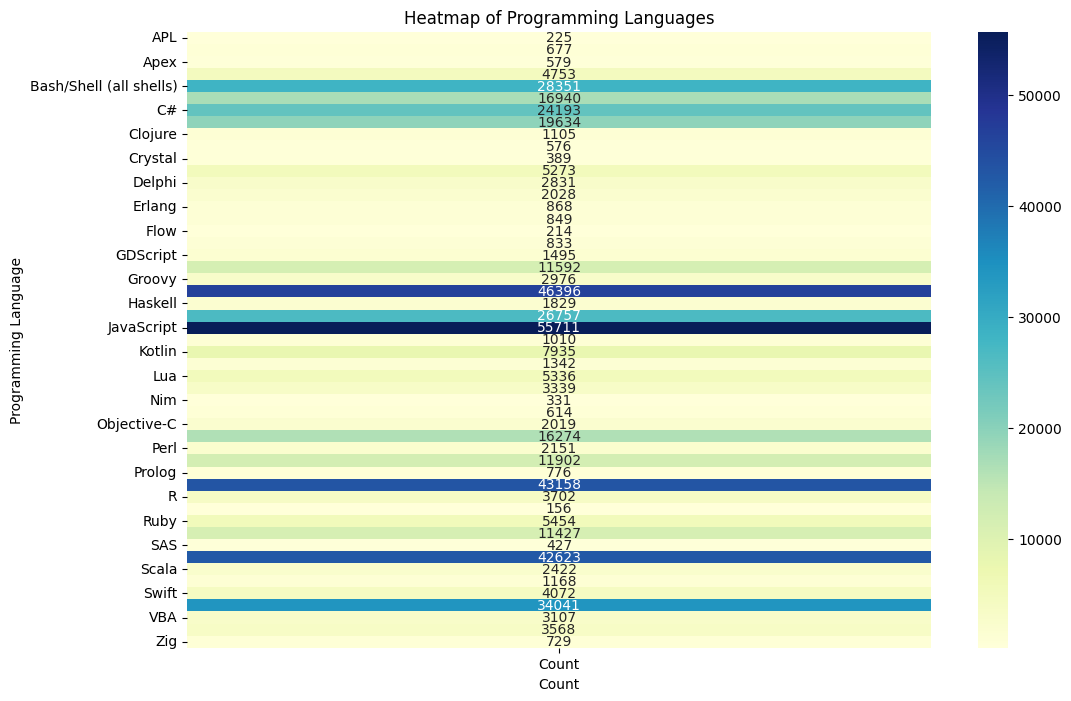

In [37]:
languages_count = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';').sum().reset_index()
languages_count.columns = ['Language', 'Count']

# Create a pivot table for heatmap
heatmap_pivot = languages_count.pivot_table(index='Language', values='Count', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.title('Heatmap of Programming Languages')
plt.show()